# **LSTM Exercise**

## Import libraries

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [41]:
# fix random seed for reproducibility
tf.random.set_seed(7)

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)
/ LAB/Dataset/traffic.csv


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/T5 Bootcamp/Dataset/week_5/Copy of traffic.csv',index_col ='DateTime', parse_dates = True)

In [ ]:
dataset

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,1,15,20151101001
2015-11-01 01:00:00,1,13,20151101011
2015-11-01 02:00:00,1,10,20151101021
2015-11-01 03:00:00,1,7,20151101031
2015-11-01 04:00:00,1,9,20151101041
...,...,...,...
2017-06-30 19:00:00,4,11,20170630194
2017-06-30 20:00:00,4,30,20170630204
2017-06-30 21:00:00,4,16,20170630214


## Normalize the dataset

In [ ]:
type(dataset[['Junction']])

pandas.core.frame.DataFrame

In [ ]:
type(dataset['Junction'])

pandas.core.series.Series

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset[['Vehicles']] = scaler.fit_transform(dataset[['Vehicles']])
dataset[['Junction']] = scaler.fit_transform(dataset[['Junction']])

In [ ]:
dataset

,Junction,Vehicles,ID
DateTime,,,
2015-11-01 00:00:00,0.0,0.078212,20151101001
2015-11-01 01:00:00,0.0,0.067039,20151101011
2015-11-01 02:00:00,0.0,0.050279,20151101021
2015-11-01 03:00:00,0.0,0.033520,20151101031
2015-11-01 04:00:00,0.0,0.044693,20151101041
...,...,...,...
2017-06-30 19:00:00,1.0,0.055866,20170630194
2017-06-30 20:00:00,1.0,0.162011,20170630204
2017-06-30 21:00:00,1.0,0.083799,20170630214


## split into train and test sets

In [ ]:
dataset = dataset.drop('ID', axis=1)

In [ ]:
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset.iloc[0:train_size,:], dataset.iloc[train_size:len(dataset),:]

In [ ]:
print(len(train), len(test))

38496 9624


## Fit the LSTM

In [ ]:
dataset

,Junction,Vehicles
DateTime,,
2015-11-01 00:00:00,0.0,0.078212
2015-11-01 01:00:00,0.0,0.067039
2015-11-01 02:00:00,0.0,0.050279
2015-11-01 03:00:00,0.0,0.033520
2015-11-01 04:00:00,0.0,0.044693
...,...,...
2017-06-30 19:00:00,1.0,0.055866
2017-06-30 20:00:00,1.0,0.162011
2017-06-30 21:00:00,1.0,0.083799


In [ ]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back), 0]  # Indent this line
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [42]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
1203/1203 - 4s - 3ms/step - loss: 0.0097
Epoch 2/100
1203/1203 - 2s - 2ms/step - loss: 2.1008e-05
Epoch 3/100
1203/1203 - 2s - 2ms/step - loss: 2.0637e-05
Epoch 4/100
1203/1203 - 2s - 2ms/step - loss: 2.0138e-05
Epoch 5/100
1203/1203 - 3s - 3ms/step - loss: 1.9375e-05
Epoch 6/100
1203/1203 - 4s - 3ms/step - loss: 1.8135e-05
Epoch 7/100
1203/1203 - 3s - 2ms/step - loss: 1.6519e-05
Epoch 8/100
1203/1203 - 2s - 2ms/step - loss: 1.4682e-05
Epoch 9/100
1203/1203 - 3s - 3ms/step - loss: 1.3187e-05
Epoch 10/100
1203/1203 - 5s - 4ms/step - loss: 1.2048e-05
Epoch 11/100
1203/1203 - 2s - 2ms/step - loss: 1.1261e-05
Epoch 12/100
1203/1203 - 3s - 2ms/step - loss: 1.0709e-05
Epoch 13/100
1203/1203 - 2s - 2ms/step - loss: 1.0282e-05
Epoch 14/100
1203/1203 - 4s - 3ms/step - loss: 9.9312e-06
Epoch 15/100
1203/1203 - 4s - 3ms/step - loss: 9.6362e-06
Epoch 16/100
1203/1203 - 3s - 2ms/step - loss: 9.3844e-06
Epoch 17/100
1203/1203 - 2s - 2ms/step - loss: 9.1675e-06
Epoch 18/100
1203/1203 - 2s

## Make preductuion and evaluatuin matrix.

In [43]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [44]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [45]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.01 RMSE
Test Score: 0.24 RMSE


## Visualize the result

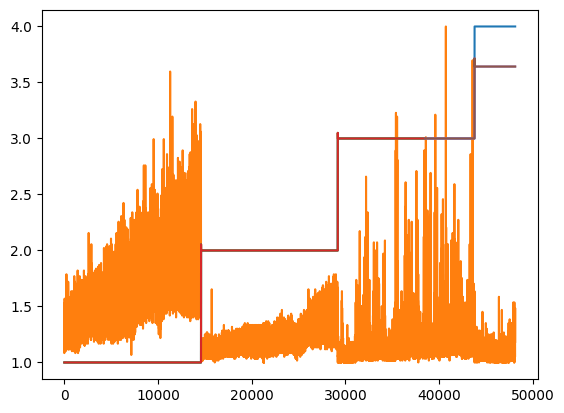

In [46]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

# **Well done** :)

# 1. Load and Prepare the Data
We need to start by loading the data, normalizing it, and creating the necessary datasets for training the LSTM model.

In [55]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('/content/drive/MyDrive/T5 Bootcamp/Dataset/week_5/Copy of traffic.csv', index_col='DateTime', parse_dates=True)

# Drop the 'ID' column as it is not needed
dataset = dataset.drop('ID', axis=1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
dataset[['Vehicles']] = scaler.fit_transform(dataset[['Vehicles']])
dataset[['Junction']] = scaler.fit_transform(dataset[['Junction']])

# Split the data into train and test sets (80/20 split)
train_size = int(len(dataset) * 0.80)
train, test = dataset.iloc[:train_size], dataset.iloc[train_size:]

#2. Create the Dataset for LSTM
Now, we'll define a function to create the dataset in the appropriate format for the LSTM model.

In [56]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset.iloc[i:(i + look_back)].values
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 1])  # Predicting 'Vehicles'
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


#3. Build and Train the LSTM Model
We will define the LSTM model, compile it, and then train it.

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, trainX.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(trainX, trainY, epochs=20, batch_size=32, validation_data=(testX, testY), verbose=2, shuffle=False)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1203/1203 - 10s - 8ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/20
1203/1203 - 9s - 7ms/step - loss: 7.5211e-04 - val_loss: 0.0010
Epoch 3/20
1203/1203 - 9s - 7ms/step - loss: 7.0157e-04 - val_loss: 9.6861e-04
Epoch 4/20
1203/1203 - 9s - 7ms/step - loss: 6.7758e-04 - val_loss: 9.4264e-04
Epoch 5/20
1203/1203 - 8s - 7ms/step - loss: 6.6457e-04 - val_loss: 9.2997e-04
Epoch 6/20
1203/1203 - 7s - 6ms/step - loss: 6.5780e-04 - val_loss: 9.2079e-04
Epoch 7/20
1203/1203 - 8s - 7ms/step - loss: 6.5180e-04 - val_loss: 9.1535e-04
Epoch 8/20
1203/1203 - 11s - 9ms/step - loss: 6.4457e-04 - val_loss: 9.1654e-04
Epoch 9/20
1203/1203 - 7s - 6ms/step - loss: 6.3223e-04 - val_loss: 9.1183e-04
Epoch 10/20
1203/1203 - 12s - 10ms/step - loss: 6.1477e-04 - val_loss: 8.9491e-04
Epoch 11/20
1203/1203 - 8s - 6ms/step - loss: 6.0142e-04 - val_loss: 8.9715e-04
Epoch 12/20
1203/1203 - 8s - 7ms/step - loss: 5.9139e-04 - val_loss: 8.9358e-04
Epoch 13/20
1203/1203 - 11s - 9ms/step - loss: 5.8521e-04 - val_loss

#4. Make Predictions
We will now make predictions on the training and testing data.

In [58]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse transform predictions and actual values to original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY_actual = scaler.inverse_transform(trainY.reshape(-1, 1))
testPredict = scaler.inverse_transform(testPredict)
testY_actual = scaler.inverse_transform(testY.reshape(-1, 1))

1203/1203 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


#5. Evaluate the Model
Calculate the root mean squared error (RMSE) to evaluate the model.

In [59]:
# Calculate RMSE
trainScore = np.sqrt(mean_squared_error(trainY_actual, trainPredict))
testScore = np.sqrt(mean_squared_error(testY_actual, testPredict))
print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')

Train Score: 0.08 RMSE
Test Score: 0.09 RMSE


#6. Visualize the Results
Finally, let's plot the predictions along with the actual values.

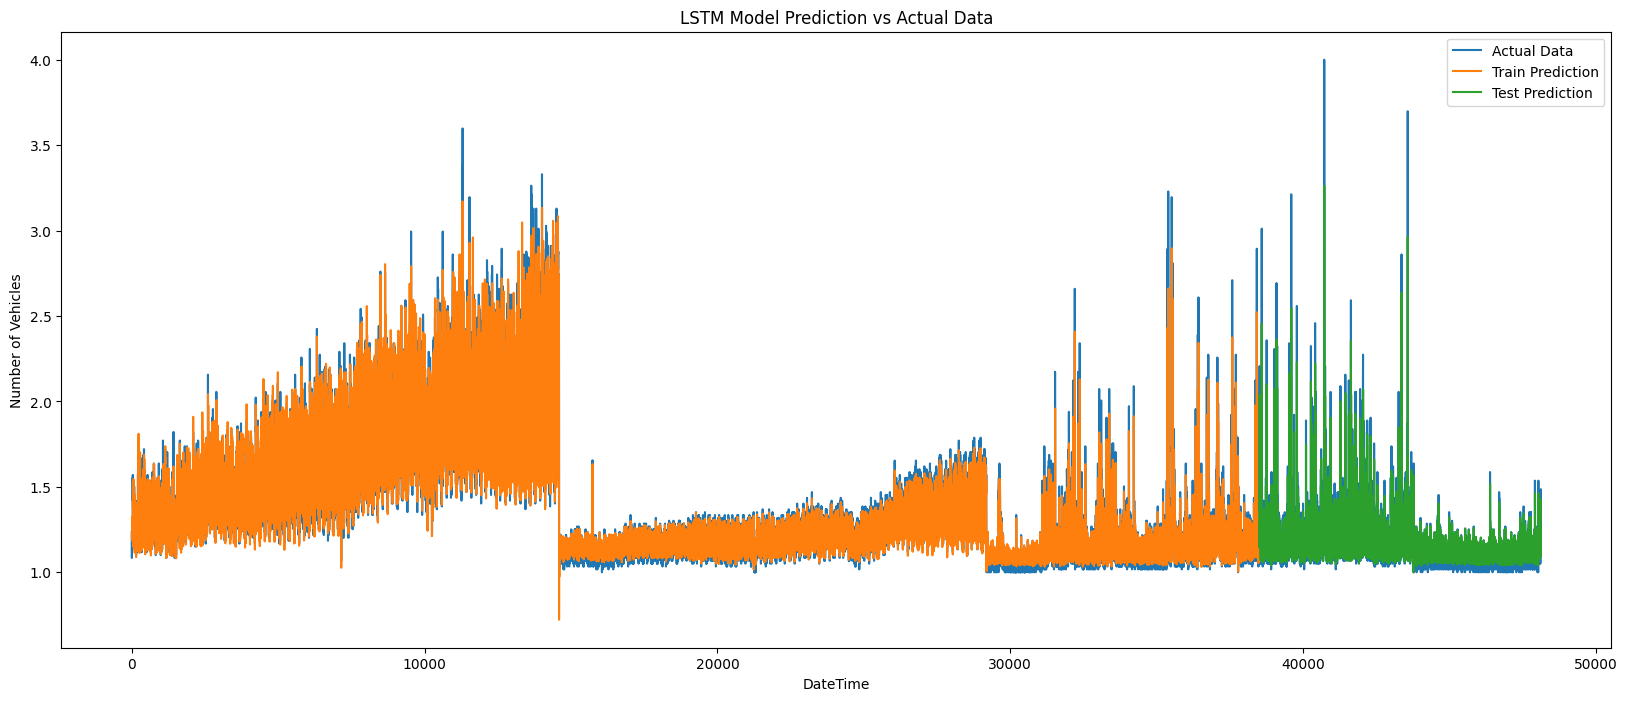

In [64]:
# Shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset[['Vehicles']])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(dataset[['Vehicles']])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2):len(trainPredict) + (look_back * 2) + len(testPredict), :] = testPredict

# Plot baseline and predictions
plt.figure(figsize=(20, 8))
plt.plot(scaler.inverse_transform(dataset[['Vehicles']]), label='Actual Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.title('LSTM Model Prediction vs Actual Data')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()


In [65]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (9614,1) into shape (9612,2)